# Tarea 7
## Francisco Javier Peralta Ramírez



In [1]:
import time
import keras

import numpy as np
import matplotlib.pyplot as plt

from keras import applications #contiene redes preentrenadas
from keras.datasets import cifar100
from keras.preprocessing import sequence
from keras.layers import Input, Dense, Dropout, Flatten
from keras.models import Sequential, Model
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

Necesitamos cambiar las etiquetas a persona y no persona. Sabemos que la etiqueta correspondiente a persona es la 14.

In [3]:
y_train[y_train != 14] = 0
y_train[y_train == 14] = 1

y_test[y_test != 14] = 0
y_test[y_test == 14] = 1

Creamos un modelo basado en VGG19, es necesario *congelar* algunas capas para que sea entrenable en tiempo aceptable

In [4]:
img_width, img_height, _ = x_train[0].shape
vgg_model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, _))
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [5]:
for layer in vgg_model.layers: layer.trainable = False
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

Añadimos nuestras propias capas

In [7]:
x = vgg_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
preds = Dense(1, activation="sigmoid")(x)

model = Model(inputs=vgg_model.input, outputs=preds)
plot_model(model, to_file='vgg_model.png', show_shapes=True, show_layer_names=True)

![alt text](./vgg_model.png "Logo Title Text 1")

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [12]:
hist = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 2/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 3/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 4/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 5/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 6/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 7/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 8/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 9/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493
Epoch 10/10
 - 7s - loss: 0.8031 - acc: 0.9502 - val_loss: 0.8172 - val_acc: 0.9493


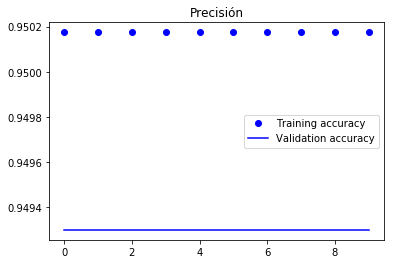

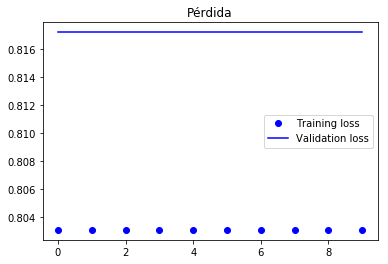

In [13]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Pérdida')
plt.legend()

plt.show()

In [14]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 3s 258us/step

acc: 95.00%
